# Local Threats
Percentage of total reef area where threats from various sources are low, medium, high, or very high.

_Author: Peter Kerins_  
_Created: 6 May 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Vertical bar chart
- Value is fraction at each threat level
- Single stacked, normalized bar per category

## Data
[ocn.calcs.007 Coral Reef Local Threats](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_007_local_threats)  

Figures from [Reefs at Risk Revisited](https://www.wri.org/research/reefs-risk-revisited)  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Visualizations

## ~Global~
Global version of "local threats" probably does not make sense.  

## Regional

### Query
Note that regional filtering happens within widget via transform

```sql
SELECT * FROM ocn_calcs_007_local_threats
```

### Specification

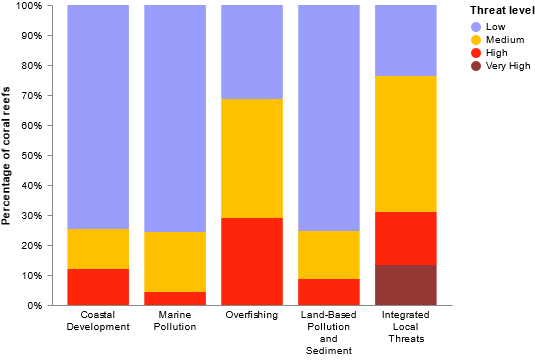

In [4]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Proportion of coral reef area under various magnitudes of local threat, separated by type of threat",
  "width": 300,
  "height": 250,
  "padding": {
    "left": 0,
    "top": 0,
    "right": 0,
    "bottom": 5
  },
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    },
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "Caribbean"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_calcs_007_local_threats&env=production",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gcrmn_reg == region_name"
        },
        {
          "type": "formula",
          "expr": "datum.area_low/datum.area_total",
          "as": "fraction_low"
        },
        {
          "type": "formula",
          "expr": "datum.area_medium/datum.area_total",
          "as": "fraction_medium"
        },
        {
          "type": "formula",
          "expr": "datum.area_high/datum.area_total",
          "as": "fraction_high"
        },
        {
          "type": "formula",
          "expr": "datum.area_veryhigh/datum.area_total",
          "as": "fraction_veryhigh"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_low+datum.fraction_medium",
          "as": "sum_low-medium"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_low+datum.fraction_medium+datum.fraction_high",
          "as": "sum_low-medium-high"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_veryhigh+datum.fraction_high",
          "as": "sum_veryhigh-high"
        },
        {
          "type": "formula",
          "expr": "datum.fraction_veryhigh+datum.fraction_high+datum.fraction_medium",
          "as": "sum_veryhigh-high-medium"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "threat"
      },
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": [
        0,
        1
      ],
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": [
        "Low",
        "Medium",
        "High",
        "Very High"
      ],
      "range": [
        "#999DFB",
        "#FFC000",
        "#FF250B",
        "#953735"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of coral reefs",
      "labelAlign": "right",
      "labelBaseline": "middle",
      "labelPadding": 5,
      "format": "%"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": "datum.value"
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "fontSize": {
              "value": 10
            },
            "align": {
              "value": "center"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": 5
            },
            "dx": {
              "value": 0
            },
            "lineBreak": {
              "value": " "
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars_veryhigh",
      "from": {
        "data": "table"
      },
      "type": "rect",
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "threat"
          },
          "width": {
            "scale": "xscale",
            "band": 1
          },
          "y": {
            "scale": "yscale",
            "value": "0"
          },
          "y2": {
            "scale": "yscale",
            "field": "fraction_veryhigh"
          },
          "fill": {
            "scale": "color",
            "value": "Very High"
          },
          "tooltip": {
            "signal": "{'Type':datum.threat, 'Threat level':'Very High', 'Percentage of reef area':format(datum.fraction_veryhigh,'.1%')}"
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        }
      }
    },
    {
      "name": "bars_high",
      "from": {
        "data": "table"
      },
      "type": "rect",
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "threat"
          },
          "width": {
            "scale": "xscale",
            "band": 1
          },
          "y": {
            "scale": "yscale",
            "field": "fraction_veryhigh"
          },
          "y2": {
            "scale": "yscale",
            "field": "sum_veryhigh-high"
          },
          "fill": {
            "scale": "color",
            "value": "High"
          },
          "tooltip": {
            "signal": "{'Type':datum.threat, 'Threat level':'High', 'Percentage of reef area':format(datum.fraction_high,'.1%')}"
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        }
      }
    },
    {
      "name": "bars_medium",
      "from": {
        "data": "table"
      },
      "type": "rect",
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "threat"
          },
          "width": {
            "scale": "xscale",
            "band": 1
          },
          "y": {
            "scale": "yscale",
            "field": "sum_veryhigh-high"
          },
          "y2": {
            "scale": "yscale",
            "field": "sum_veryhigh-high-medium"
          },
          "fill": {
            "scale": "color",
            "value": "Medium"
          },
          "tooltip": {
            "signal": "{'Type':datum.threat, 'Threat level':'Medium', 'Percentage of reef area':format(datum.fraction_medium,'.1%')}"
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        }
      }
    },
    {
      "name": "bars_low",
      "from": {
        "data": "table"
      },
      "type": "rect",
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "threat"
          },
          "width": {
            "scale": "xscale",
            "band": 1
          },
          "y": {
            "scale": "yscale",
            "field": "sum_veryhigh-high-medium"
          },
          "y2": {
            "scale": "yscale",
            "value": 1
          },
          "fill": {
            "scale": "color",
            "value": "Low"
          },
          "tooltip": {
            "signal": "{'Type':datum.threat, 'Threat level':'Low', 'Percentage of reef area':format(datum.fraction_low,'.1%')}"
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Threat level"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

### RW API
Parent dataset [bio.024.rw0 Local Threats to Coral Reefs](https://resourcewatch.org/data/explore/bio024-try-2) ([Admin](https://resourcewatch.org/admin/data/datasets/d553a58a-faa2-480d-b137-c96d76d5ccab/edit))    
API ID [`d553a58a-faa2-480d-b137-c96d76d5ccab`](https://api.resourcewatch.org/v1/dataset/d553a58a-faa2-480d-b137-c96d76d5ccab/)  
[Widgets](https://api.resourcewatch.org/v1/dataset/d553a58a-faa2-480d-b137-c96d76d5ccab/widget)

Lightly modified version of widget passed to API via [widget scripts](https://github.com/resource-watch/data-team-tools/tree/master/advanced_widget_writer). Key variables to modify in script, besides specification itself:

In [2]:
dataset_id = 'd553a58a-faa2-480d-b137-c96d76d5ccab'
name = 'Local Threats to Coral Reefs in <GCRMN Region>'
description = 'Proportion of coral reef area under various magnitudes of local threat, separated by type of threat'

    "info": {
      "widgetLinks": [
        {
          "link": "https://www.wri.org/publication/reefs-risk-revisited",
          "name": "\"Reefs at Risk Revisited\" by WRI"
        },
        {
          "link": "https://wriorg.s3.amazonaws.com/s3fs-public/technical_notes.pdf",
          "name": "\"Reefs at Risk Revisited: Technical Notes on Modeling Threats to the World’s Coral Reefs\""
        },
        {
          "link": "https://resourcewatch.org/data/explore/d553a58a-faa2-480d-b137-c96d76d5ccab",
          "name": "Local Threats to Coral Reefs on Resource Watch"
        }
      ],
      "caption": "Data: World Resources Institute"
    }

- [Australia](https://api.resourcewatch.org/v1/widget/4bf526de-7ab5-49a0-a677-fb34fd84f880?env=production) `4bf526de-7ab5-49a0-a677-fb34fd84f880`  
- [Brazil](https://api.resourcewatch.org/v1/widget/a76bedc7-ee0d-4970-9064-9c34bcb02b77?env=production) `a76bedc7-ee0d-4970-9064-9c34bcb02b77`  
- [Caribbean](https://api.resourcewatch.org/v1/widget/b56bbb92-d8e1-4c03-ac46-1257fbfd1c41?env=production) `b56bbb92-d8e1-4c03-ac46-1257fbfd1c41`  
- [East Asia](https://api.resourcewatch.org/v1/widget/1b22ddbc-9238-4d7b-bf8f-45218d3f8734?env=production) `1b22ddbc-9238-4d7b-bf8f-45218d3f8734`  
- [ETP](https://api.resourcewatch.org/v1/widget/55608573-e220-402f-949a-e61f7e347be3?env=production) `55608573-e220-402f-949a-e61f7e347be3`  
- [Pacific](https://api.resourcewatch.org/v1/widget/bbeb1350-9606-4ecb-a099-020e350a858b?env=production) `bbeb1350-9606-4ecb-a099-020e350a858b`  
- [PERSGA](https://api.resourcewatch.org/v1/widget/7158a8f0-29a5-4ae8-a122-f8d1f515ee77?env=production) `7158a8f0-29a5-4ae8-a122-f8d1f515ee77`  
- [ROPME](https://api.resourcewatch.org/v1/widget/e2339455-71ec-4479-bb42-c1b84315dfb9?env=production) `e2339455-71ec-4479-bb42-c1b84315dfb9`  
- [South Asia](https://api.resourcewatch.org/v1/widget/9f855044-eb5c-46bf-9db9-512c9814f0d2?env=production) `9f855044-eb5c-46bf-9db9-512c9814f0d2`  
- [WIO](https://api.resourcewatch.org/v1/widget/2453d1fd-a576-41f7-80b9-b3631837e83f?env=production) `2453d1fd-a576-41f7-80b9-b3631837e83f`  
  
- [Select Region](https://api.resourcewatch.org/v1/widget/d2735344-1f31-41e1-8764-8d943b668db2?env=production) `d2735344-1f31-41e1-8764-8d943b668db2`  